We try to generate insights for the company whether to focus their efforts on their mobile app experience or their website.

In [30]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
plt.style.use('ggplot')
import warnings
from sklearn.model_selection import train_test_split # type: ignore
warnings.filterwarnings("ignore")

In [3]:
csv_file = "datasets/Ecommerce_Customers_01.csv"

In [4]:
df = pd.read_csv(csv_file)
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


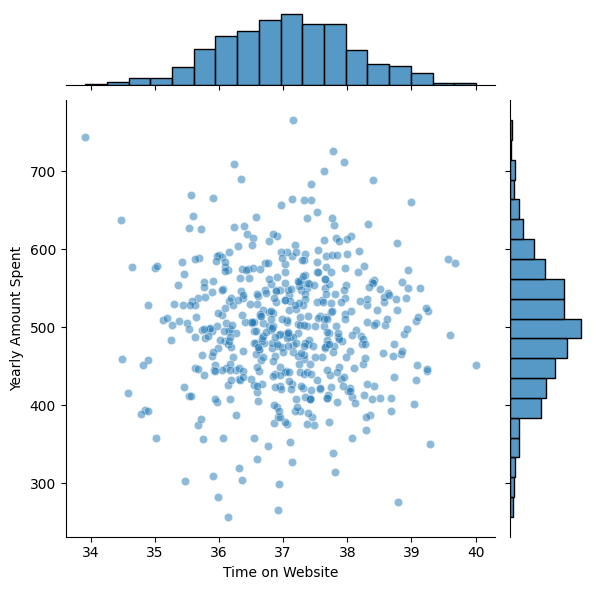

In [7]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=df, alpha=0.5)

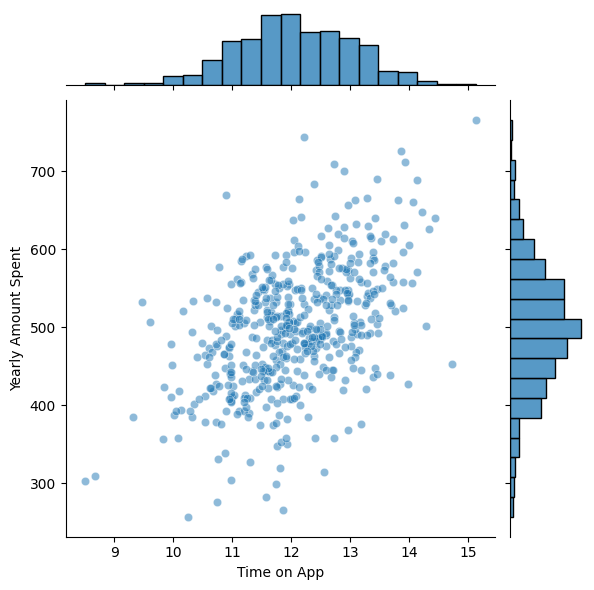

In [14]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent", data=df, alpha=0.5)

Here, we can see a significant linear relation between time on app vs yearly amount spent.

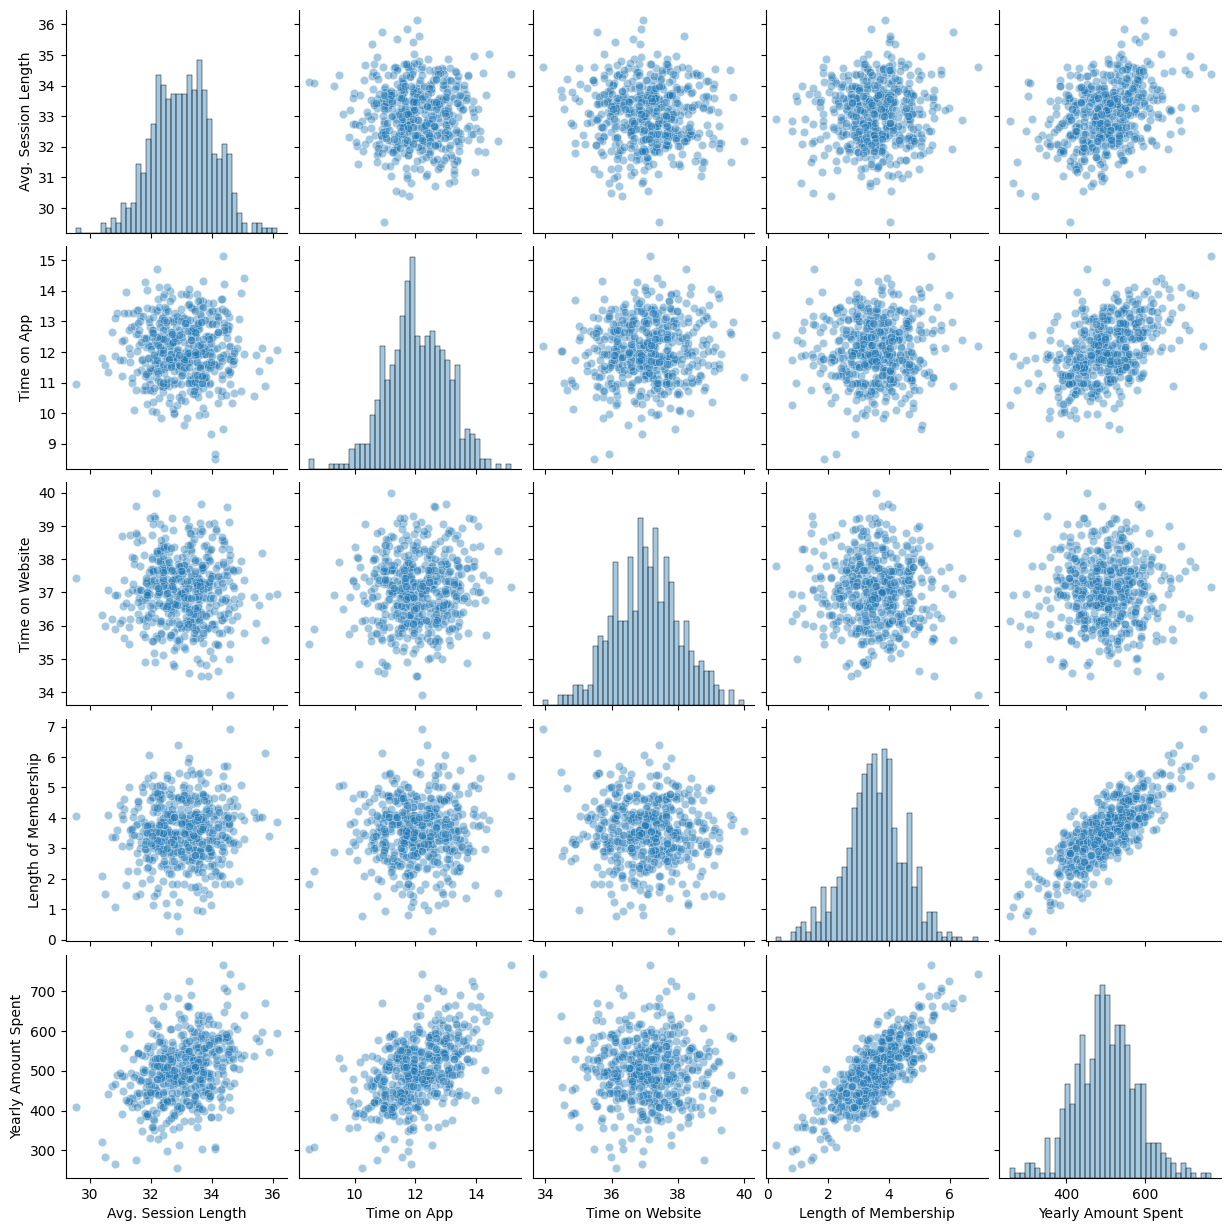

In [8]:
sns.pairplot(data=df,
             kind="scatter",
             plot_kws={'alpha':0.4},
             diag_kws={"alpha":0.4, "bins":40})

Considering the Yearly Amount Spend as the target variable, we can say that Time on App and Length of Membership seems to be correlated whereas Avg. Session Length and Time on Website are not correlated at all.

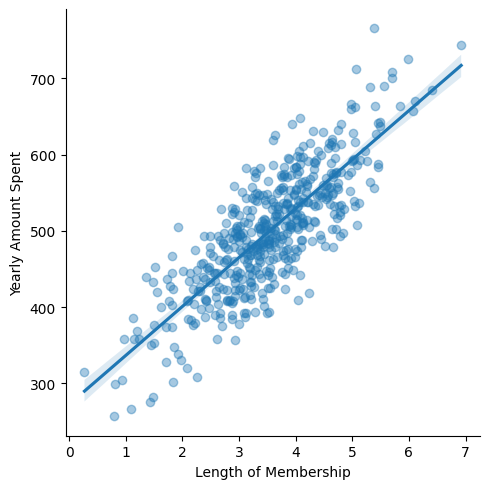

In [9]:
sns.lmplot(data=df,
           x="Length of Membership",
           y="Yearly Amount Spent",
           scatter_kws={"alpha":0.4})

Insights

Here, we can see a line where the sum of squares of the points to the line is minimum.
Our aim here to find the regression equation fo this line.
Summary of the Insights got from the plot

As the plots suggested, we find that the most important coefficient is that of the "Length of Membership" predictor, followed by the 'Time on App' and the 'Avg. Session Length'. The time on website does not seem to be an important factor to the amount a customer spends per year since the correlation seems to be so less.

In [12]:
customers = df.copy()

In [13]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [16]:
y = customers[["Yearly Amount Spent"]]
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
print(X.shape, y.shape)

(500, 4) (500, 1)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [20]:
from sklearn.linear_model import LinearRegression # type: ignore
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
model.coef_

array([[25.79187592, 38.80672394,  0.19510947, 61.7585427 ]])

In [25]:
cdf = pd.DataFrame(model.coef_[0],X.columns,columns=['Coef'])
cdf.head()

,Coef
Avg. Session Length,25.791876
Time on App,38.806724
Time on Website,0.195109
Length of Membership,61.758543


In [26]:
model.score(X_train, y_train)

0.9861802243435411

<h4>Predicting Test Data</h4>
Now that the model is trained, we should be able to use it to make our predictions and evaluate our model. The scatter plot below plots the actual y values to the model's predictions. The model seems to behave accurately.

In [27]:
predictions = model.predict(X_test)

Text(0.5, 1.0, 'Yearly Amount Spent ')

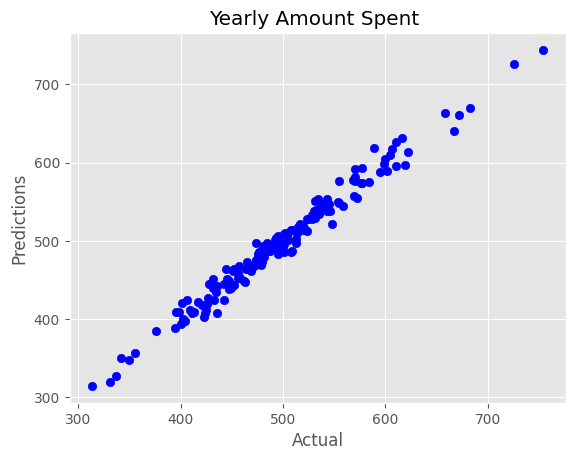

In [34]:
plt.scatter(predictions, y_test, color="blue" )
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent ')

Since the scatter plot between the actual and predicted values of Yearly Amount spend is a straight line we can say that our model has done a good job.

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # type: ignore
import math

In [37]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 8.677186479885673
Mean Squared Error: 119.12628271632288
Root Mean Squared Error: 10.914498738665138


Mean Absolute Error is the average of all the absolute errors(absolute difference in the actual and predicted values of the target variable). 
Here, it is 8.5 Dollars.
Mean Squared Error is the average of squares of the difference in the actual and predicted values of the target variable. 
Here, it is 104 Dollars.
Root Mean Squared Error is the root of the average of squares of the difference in the actual and predicted values of the target variable. 
Here, it is 10.2 Dollars.
Since the RMSE is low, we can see the model,s performance is good.

In [38]:
residuals = y_test - predictions
residuals

,Yearly Amount Spent
17,-3.176536
127,0.250329
363,3.711440
82,-22.912827
60,10.560559
...,...
256,-8.800507
179,-3.690856
36,-1.434910
462,-6.824329


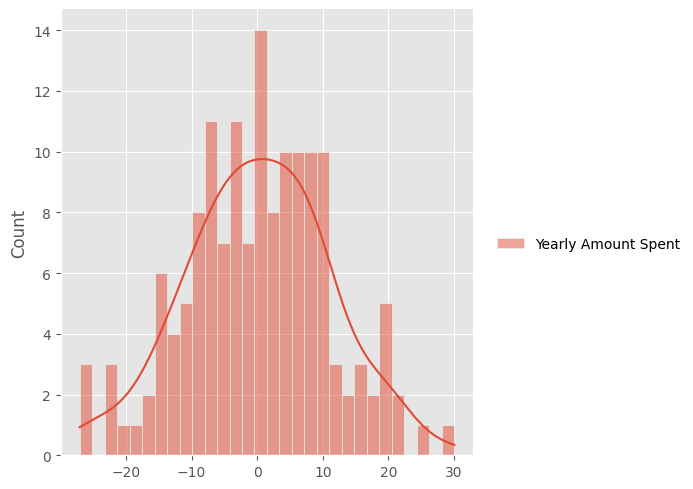

In [40]:
sns.displot(residuals, bins=30, kde=True)

Distribution plot of the residuals of the model's predictions is normally distributed which supports the assumption of Linear Regression.

According to the model, the most significant factor for clients is not the time spent on the application or website, but their length of membership. However, of the two predictors (Time spend on desktop vs application), the application has the strongest influence. That is according to the data, the amount of time that the customer spends on the desktop website has almost nothing to do with the amount of money they will spend.

We could interpret this in two different ways. Firstly, this could mean that the desktop website needs more work to make its visitors buy more. Secondly, it could mean that people tend to be more influenced by mobile applications of online stores than by desktop websites. So maybe efforts should be directed towards taking advantage of this fact. However, the interpretation of this insights from the data requires expertise in the online marketing sphere.